## Multiclass logistic regression

Multiclass logistic regression extends binary logistic regression so it can handle three or more classes (here: three flower types) using the same basic ideas: linear scores plus a logistic-style conversion to probabilities. 

Scikit‑learn supports two main tactics for this: one‑vs‑rest and true multinomial logistic regression, both controlled by a simple parameter in LogisticRegression.

### One‑vs‑rest vs multinomial: concept and code

##### One‑vs‑rest (OvR)

- One‑vs‑rest splits a K‑class problem into K separate binary problems.​
- For three classes A, B, C, it trains three binary models:
    - Model 1: A vs (not A)
    - Model 2: B vs (not B)
    - Model 3: C vs (not C)
- At prediction time, each model outputs a score; the class whose model is most confident “wins.”​
- In scikit‑learn, this is selected with multi_class='ovr'.​

In [8]:
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
df['species'] = iris.target  # 0, 1, 2

X = df[['pl', 'pw']].values      # two inputs
y = df['species'].values         # three classes: 0,1,2

logit_ovr = LogisticRegression(multi_class='ovr')  # one-vs-rest
logit_ovr.fit(X, y)

# This learns three sets of coefficients (one per class) and 
# forms three decision score functions; the 2D plot shows three 
# colored regions corresponding to the predicted class.

/home/vinny/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

##### Multinomial logistic regression

- Multinomial logistic regression treats all classes jointly in one optimization problem instead of K independent ones.​ 

- It uses a softmax‑style function to turn K linear scores into K probabilities that sum to 1.​ 

- In scikit‑learn, this is selected with multi_class='multinomial' and a solver that supports it (lbfgs, sag, saga, or newton-cg).


In [9]:
logit_multi = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',   # supports multinomial
    max_iter=1000
)
logit_multi.fit(X, y)

/home/vinny/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

- The resulting decision regions in the petal‑length / petal‑width plane can look different from OvR, because the model considers all three classes together.​

- It is not obvious by eye which is better; to compare them, you would compute metrics such as accuracy, precision, and recall on a held‑out test set, just as in k‑NN evaluation.

### Visualizing multiclass decision regions
Once the model is fitted, you can visualize decision regions for the three classes over the 2D feature space.​

A simple way is to create a grid of points, classify each grid point, and color the background accordingly.

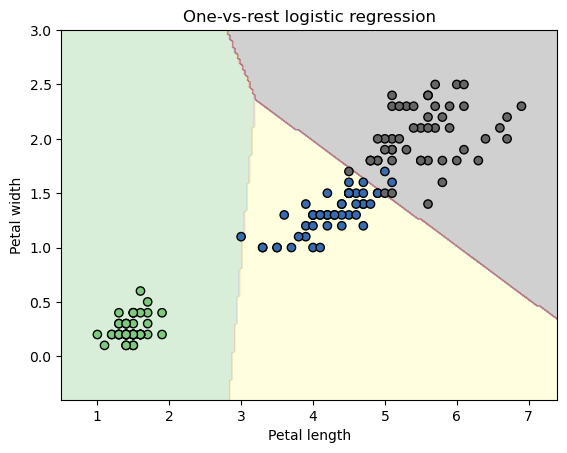

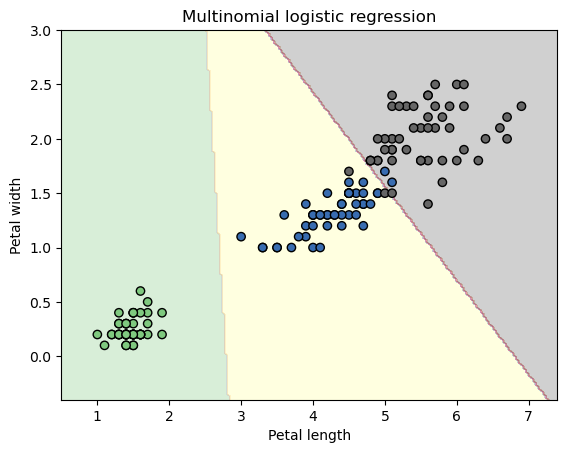

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_regions(model, X, y, title):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='Accent')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title(title)
    plt.show()

plot_regions(logit_ovr,  X, y, "One-vs-rest logistic regression")
plot_regions(logit_multi, X, y, "Multinomial logistic regression")


- For each model you see three colored regions; boundaries between regions show where class predictions change.

### Evaluating OvR vs multinomial (what the transcript hints at)

To decide which is “better,” split your data into train and test sets and evaluate metrics.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logit_ovr.fit(X_train, y_train)
logit_multi.fit(X_train, y_train)

y_pred_ovr = logit_ovr.predict(X_test)
y_pred_multi = logit_multi.predict(X_test)

print("OvR accuracy:", accuracy_score(y_test, y_pred_ovr))
print("Multinomial accuracy:", accuracy_score(y_test, y_pred_multi))
print("OvR report:\n", classification_report(y_test, y_pred_ovr))
print("Multinomial report:\n", classification_report(y_test, y_pred_multi))


OvR accuracy: 1.0
Multinomial accuracy: 1.0
OvR report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Multinomial report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/home/vinny/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/vinny/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### L1 regularization for feature selection
L1 regularization can zero out some coefficients, effectively telling you which features are most useful.

##### What L1 and C mean

- penalty='l1' adds an L1 penalty to the loss, which encourages many coefficients to shrink to exactly zero.​

- C in scikit‑learn is the inverse of regularization strength:
    - Smaller C → stronger regularization (more pressure to push small coefficients to zero).
    - Larger C → weaker regularization (coefficients freer to stay non‑zero).​

##### Setup in the transcript
- Use all four features (sl, sw, pl, pw) but only two classes (e.g., versicolor and virginica) so it’s a binary problem.​

- Train several logistic regression models with penalty='l1' and different C values, and store their coefficients.

In [12]:
from sklearn.linear_model import LogisticRegression

# Keep only two species (e.g., 1 and 2)
df_2 = df[df['species'].isin([1, 2])]
X4 = df_2[['sl', 'sw', 'pl', 'pw']].values
y2 = df_2['species'].values

# Make binary labels 0/1 instead of 1/2 (optional but common)
y_bin = (y2 == 2).astype(int)  # 1 for virginica, 0 for versicolor

# Range of C values (stronger reg on left)
Cs = np.logspace(-1.2, -0.5, num=20)  # about 0.06 to 0.32
coefs = []

for C in Cs:
    clf = LogisticRegression(
        penalty='l1',
        solver='liblinear',  # supports L1
        C=C,
        max_iter=1000
    )
    clf.fit(X4, y_bin)
    coefs.append(clf.coef_[0])  # 4 coefficients: sl, sw, pl, pw

coefs = np.array(coefs)  # shape: (len(Cs), 4)


##### Visualizing coefficient paths

Plot each feature’s coefficient as a function of C.

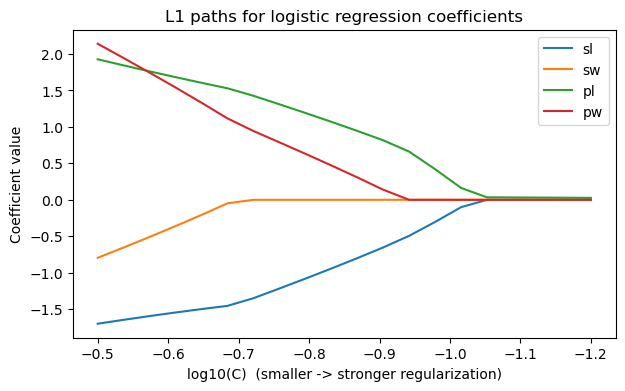

In [13]:
feature_names = ['sl', 'sw', 'pl', 'pw']

import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
for i, name in enumerate(feature_names):
    plt.plot(np.log10(Cs), coefs[:, i], label=name)

plt.gca().invert_xaxis()  # smaller C (stronger reg) on right, as in the transcript
plt.xlabel('log10(C)  (smaller -> stronger regularization)')
plt.ylabel('Coefficient value')
plt.legend()
plt.title('L1 paths for logistic regression coefficients')
plt.show()


As C gets smaller (moving right after inverting x‑axis), regularization becomes stronger:

- Coefficients that contribute less to prediction shrink toward zero earlier.

- The plot described in the transcript shows that:

    - The sepal width coefficient hits zero first.
    - Next petal width, then sepal length.
    - Petal length is the last to remain non‑zero.

##### Using this as feature ranking

- The order in which coefficients vanish as regularization strengthens gives a ranking of feature importance.​

- From the described coefficient paths, you can infer:

    - If you can only keep one feature, keep petal length (most robust, survives strongest regularization).
    - If you can keep two, add sepal length.
    - For three, also include petal width.
    - Sepal width is least useful in this specific classification task.

- In larger problems (hundreds of features), the same idea lets you:

    - Run L1‑regularized logistic regression.
    - Look at which features have non‑zero coefficients at a chosen C.
    - Treat those as selected features and optionally drop the rest or feed them into another model.​

### Key beginner points to remember

- Multiclass logistic regression in scikit‑learn is just LogisticRegression(multi_class='ovr' or 'multinomial') plus fit(X, y).​

- One‑vs‑rest trains one binary model per class; multinomial does everything in one joint model.

- Decision regions for three classes in 2D show which class the model predicts at each point; different strategies give slightly different boundaries.​

- L1 regularization (penalty='l1', small C) pushes many coefficients to zero, turning logistic regression into a simple and effective feature selector.